In [2]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [11]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

connection = mysql.connector.connect(
    host="localhost",
    port="3306",
    user="root",
    password="himaja1212",
    database=" expense_tracker"
)

In [4]:
#cursor is like a messeger between python and sql it helps to send commands in python to sql and results will be shown

cursor=connection.cursor()

cursor.execute("SHOW TABLES;")



In [5]:
for table in cursor:
    print(table)

('expenses',)


In [6]:
df=pd.read_sql("select * from expenses",connection)
print(df.head())

connection.close()

   ID        date    title       category       account  amount currency  \
0   1  2024-08-11  Karthik   Bills & Fees  Savings Bank    45.0      INR   
1   2  2024-08-10    Juice  Food & Drinks          Cash    40.0      INR   
2   3  2024-08-09     Tire      Transport          Cash    10.0      INR   
3   4  2024-08-07     Baba   Bills & Fees  Savings Bank   200.0      INR   
4   5  2024-08-04   Reward   Bills & Fees   Salary Bank     4.0      INR   

      type  transfer_amount transfer_currency to_account  receive_amount  \
0  EXPENSE              0.0              None       None             0.0   
1  EXPENSE              0.0              None       None             0.0   
2  EXPENSE              0.0              None       None             0.0   
3  EXPENSE              0.0              None       None             0.0   
4   INCOME              0.0              None       None             0.0   

  receive_currency     description due_date  
0             None  No-description     N

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9148\3483726245.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql("select * from expenses",connection)


In [7]:
 # Stats for numeric columns
df.describe()

,ID,amount,transfer_amount,receive_amount
count,152.000000,152.000000,152.000000,152.000000
mean,81.013158,135.677632,1.973684,1.973684
std,47.312122,155.896748,24.333213,24.333213
min,1.000000,0.000000,0.000000,0.000000
25%,40.750000,30.000000,0.000000,0.000000
50%,79.500000,70.000000,0.000000,0.000000
75%,122.250000,200.000000,0.000000,0.000000
max,161.000000,799.000000,300.000000,300.000000


In [8]:
 # Column types, nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 152 non-null    int64  
 1   date               152 non-null    object 
 2   title              152 non-null    object 
 3   category           152 non-null    object 
 4   account            152 non-null    object 
 5   amount             152 non-null    float64
 6   currency           152 non-null    object 
 7   type               152 non-null    object 
 8   transfer_amount    152 non-null    float64
 9   transfer_currency  152 non-null    object 
 10  to_account         152 non-null    object 
 11  receive_amount     152 non-null    float64
 12  receive_currency   152 non-null    object 
 13  description        152 non-null    object 
 14  due_date           0 non-null      object 
dtypes: float64(3), int64(1), object(11)
memory usage: 17.9+ KB


In [24]:
import os
os.getcwd()

'C:\\Users\\ASUS'

In [9]:
#rows ,colums
df.shape

(152, 15)

In [10]:
 # Preview first 5 rows
df.head()     

,ID,date,title,category,account,amount,currency,type,transfer_amount,transfer_currency,to_account,receive_amount,receive_currency,description,due_date
0,1,2024-08-11,Karthik,Bills & Fees,Savings Bank,45.0,INR,EXPENSE,0.0,None,None,0.0,None,No-description,None
1,2,2024-08-10,Juice,Food & Drinks,Cash,40.0,INR,EXPENSE,0.0,None,None,0.0,None,No-description,None
2,3,2024-08-09,Tire,Transport,Cash,10.0,INR,EXPENSE,0.0,None,None,0.0,None,No-description,None
3,4,2024-08-07,Baba,Bills & Fees,Savings Bank,200.0,INR,EXPENSE,0.0,None,None,0.0,None,No-description,None
4,5,2024-08-04,Reward,Bills & Fees,Salary Bank,4.0,INR,INCOME,0.0,None,None,0.0,None,No-description,None


In [13]:
#checking null values
df.isnull().sum()

ID                     0
date                   0
title                  0
category               0
account                0
amount                 0
currency               0
type                   0
transfer_amount        0
transfer_currency      0
to_account             0
receive_amount         0
receive_currency       0
description            0
due_date             152
dtype: int64

In [ ]:
#: Compare how much money you earned vs how much you spent.

<Axes: xlabel='type'>

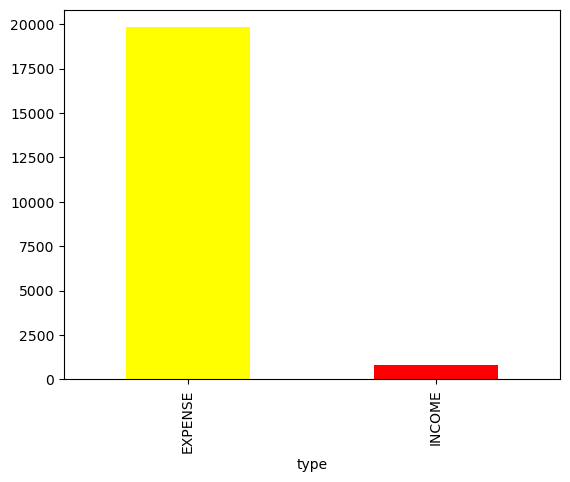

In [30]:
#: Compare how much money you earned vs how much you spent.
df.groupby('type')['amount'].sum().plot(kind='bar', color=['yellow','red'])

In [ ]:
# Find which categories you spend the most on

<Axes: xlabel='category'>

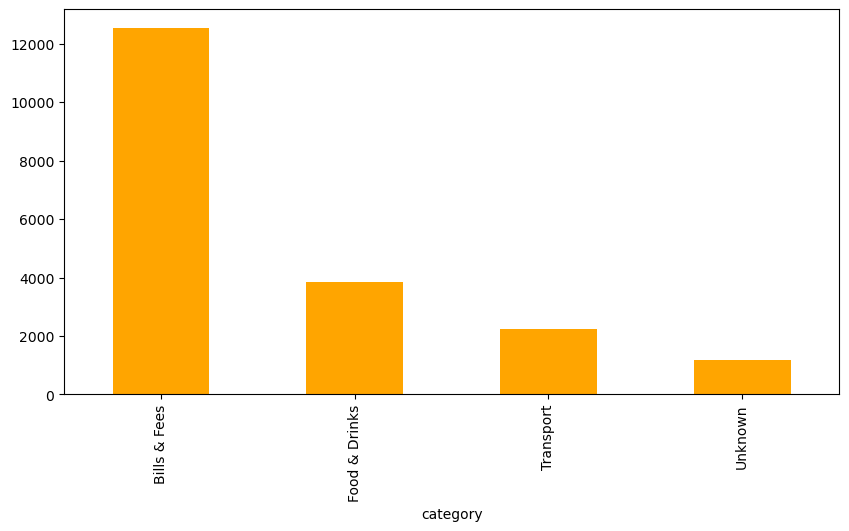

In [31]:
# Find which categories you spend the most on
expense_df = df[df['type'] == 'EXPENSE']
top_categories = expense_df.groupby('category')['amount'].sum().sort_values(ascending=False)

top_categories.plot(kind='bar', figsize=(10,5), color='orange')


In [ ]:
#See which months had high or low spending

<Axes: xlabel='month'>

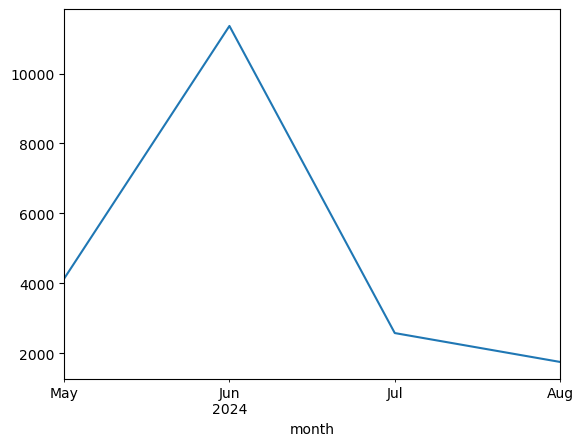

In [25]:
#See which months had high or low spending

df['date'] = pd.to_datetime(df['date'])  # convert to date type
df['month'] = df['date'].dt.to_period('M')
df[df['type'] == 'EXPENSE'].groupby('month')['amount'].sum().plot(kind='line')



In [ ]:
# Which categories do I spend on most frequently?

<Axes: xlabel='category'>

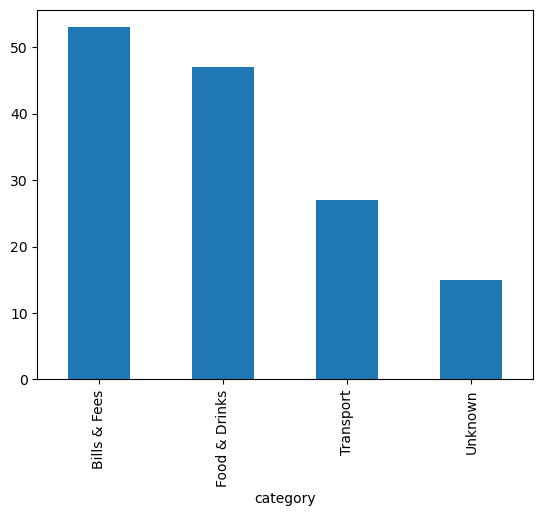

In [26]:
# Which categories do I spend on most frequently?

expense_df['category'].value_counts().plot(kind='bar')


In [ ]:
# Show how your money adds up month by month

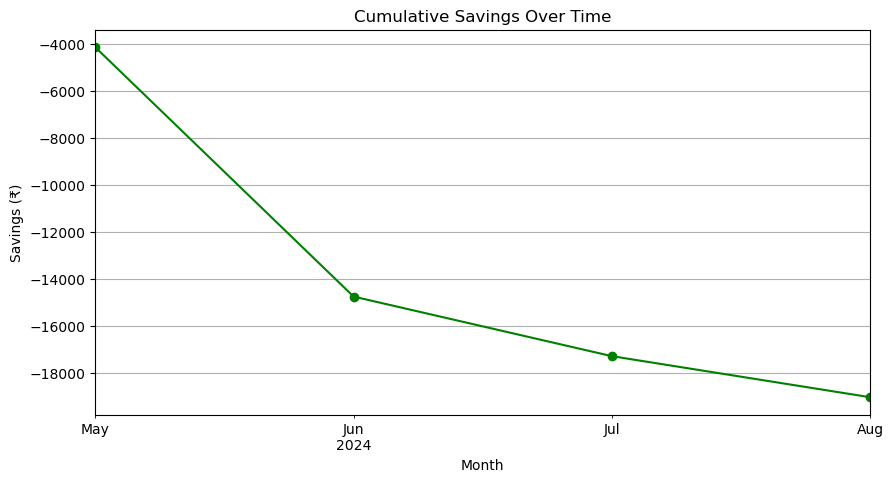

In [34]:
# Show how your money adds up month by month

# Create a new column called 'net'

df['net'] = df.apply(lambda row: row['amount'] if row['type'] == 'INCOME' else -row['amount'], axis=1)

# Step 2: Extract the month from the date
df['month'] = df['date'].dt.to_period('M')

# Step 3: Group by month and sum the net savings
monthly_savings = df.groupby('month')['net'].sum()

# Step 4: Calculate the cumulative savings over time
cumulative_savings = monthly_savings.cumsum()

# Step 5: Plot the cumulative savings
cumulative_savings.plot(kind='line', marker='o', figsize=(10,5), color='green')
plt.title("Cumulative Savings Over Time")
plt.xlabel("Month")
plt.ylabel("Savings (₹)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

